# Random Forest Classifier VS Decision Tree

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Check Data

In [36]:
dataOF = fetch_olivetti_faces()
dir(dataOF)

['DESCR', 'data', 'images', 'target']

In [37]:
dataOF['data'][0].shape

(4096,)

In [38]:
dataOF['images'][0].shape

(64, 64)

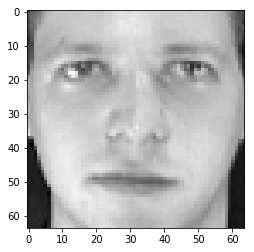

In [39]:
plt.imshow(dataOF['images'][0], cmap = 'gray')

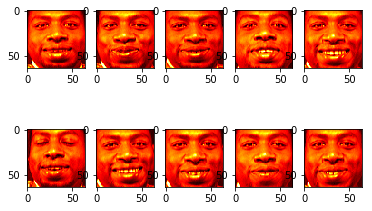

In [40]:
orangke = 22
fig = plt.figure('wajah orang')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(dataOF['images'][i + (10 * (orangke - 1))], cmap = 'hot')

### 2. Splitting datasets & create model predict

In [41]:
xtr, xts, ytr, yts = train_test_split(
    dataOF['data'],
    dataOF['target'],
    test_size = .1
)
xtr[0].shape

(4096,)

In [48]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(xtr, ytr)
model.score(xts, yts)

model2 = DecisionTreeClassifier()
model2.fit(xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
xts[0]

array([0.23966943, 0.2644628 , 0.446281  , ..., 0.61157024, 0.2231405 ,
       0.1983471 ], dtype=float32)

In [68]:
model.predict([xts[0]])[0]

6

In [65]:
yts[0]

35

In [53]:
model.predict_proba([xts[0]])

array([[0.06, 0.01, 0.02, 0.  , 0.03, 0.02, 0.33, 0.  , 0.  , 0.  , 0.01,
        0.  , 0.  , 0.01, 0.  , 0.07, 0.01, 0.01, 0.01, 0.02, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.04, 0.  ,
        0.  , 0.  , 0.31, 0.  , 0.  , 0.  , 0.01]])

### 3. Plotting

Text(0.5, 1.0, 'Asli: 35 / Prediksi: 2 / Confident: 1.0')

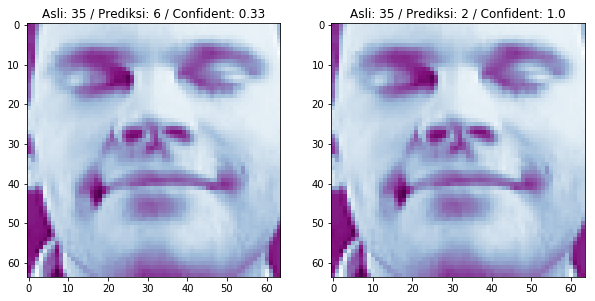

In [62]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(xts[0].reshape(64, 64), cmap = 'BuPu_r')
asli = yts [0]
prediksi = model.predict([xts[0]])[0]
confident = np.max(model.predict_proba([xts[0]]))
plt.title(f'Asli: {asli} / Prediksi: {prediksi} / Confident: {confident}')

plt.subplot(122)
plt.imshow(xts[0].reshape(64, 64), cmap = 'BuPu_r')
asli = yts [0]
prediksi = model2.predict([xts[0]])[0]
confident = np.max(model2.predict_proba([xts[0]]))
plt.title(f'Asli: {asli} / Prediksi: {prediksi} / Confident: {confident}')